In [278]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import our own implementations
import importlib, gradient_descent, OLS, prepare_data, polynomial_features, Ridge
importlib.reload(gradient_descent)
importlib.reload(OLS)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)
importlib.reload(Ridge)

from prepare_data import prepare_data
from polynomial_features import polynomial_features
from gradient_descent import gradient_descent_OLS, gradient_descent_Ridge, \
    momentum_gradient_descent_OLS, momentum_gradient_descent_Ridge, \
        ADAGrad_gradient_descent_OLS, ADAGrad_gradient_descent_Ridge, \
        RMSProp_gradient_descent_OLS, RMSProp_gradient_descent_Ridge
from OLS import OLS_parameters
from Ridge import Ridge_parameters

In [279]:
# Test, GD with momentum, OLS :
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

p = 5

X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

beta = gradient_descent_OLS(X_train_s, y_train, eta=0.1, num_iters=100000, print_num_iters=True)
print("Vanlig GD: ", beta)
beta_momentum = momentum_gradient_descent_OLS(X_train_s, y_train, eta=0.1, num_iters=100000, print_num_iters=True, momentum=0.9)
beta_closed = OLS_parameters(X_train_s, y_train)
print("GD med momentum: ", beta_momentum)

print("Closed-form OLS coefficients: ", beta_closed)

Number of iterations:  9436
Vanlig GD:  [-0.05363074 -0.70385857  0.12499872  0.5082594  -0.0711554 ]
Number of iterations:  1075
GD med momentum:  [-0.05363431 -0.70385874  0.12500907  0.50825946 -0.07116258]
Closed-form OLS coefficients:  [-0.05363465 -0.70385875  0.12501007  0.50825947 -0.07116328]


In [280]:
# Test, GD with momentum, Ridge:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

p = 5

X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

beta = gradient_descent_Ridge(X_train_s, y_train, eta=0.001, num_iters=10000, print_num_iters=True)
print("Vanlig GD: ", beta)
beta_momentum = momentum_gradient_descent_Ridge(X_train_s, y_train, eta=0.001, num_iters=10000, print_num_iters=True, momentum=0.9)
print("GD med momentum: ", beta_momentum)
beta_closed = Ridge_parameters(X_train_s, y_train)
print("Closed-form Ridge coefficients: ", beta_closed)

Number of iterations:  3294
Vanlig GD:  [-0.03040138 -0.55497486  0.03348572  0.36136473 -0.00513236]
Number of iterations:  281
GD med momentum:  [-0.03040266 -0.55497499  0.03348945  0.3613649  -0.00513493]
Closed-form Ridge coefficients:  [-0.03040265 -0.55497492  0.0334894   0.36136476 -0.00513492]


In [281]:
# Test, GD with ADAGrad, OLS:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

p = 5

X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

beta = gradient_descent_OLS(X_train_s, y_train, eta=0.1, num_iters=100000, print_num_iters=True)
print("Vanlig GD: ", beta)
beta_ADAGrad = ADAGrad_gradient_descent_OLS(X_train_s, y_train, eta=0.1, num_iters=100000, print_num_iters=True)
print("GD with ADAGrad: ", beta_ADAGrad)

beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)

Number of iterations:  9436
Vanlig GD:  [-0.05363074 -0.70385857  0.12499872  0.5082594  -0.0711554 ]
Number of iterations:  5455
GD with ADAGrad:  [-0.05363253 -0.70385865  0.1250039   0.50825943 -0.07115899]
Closed-form OLS coefficients:  [-0.05363465 -0.70385875  0.12501007  0.50825947 -0.07116328]


In [282]:
# Test, GD with ADAGrad, Ridge:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

p = 5

X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

beta = gradient_descent_Ridge(X_train_s, y_train, eta=0.001, num_iters=10000, print_num_iters=True)
print("Vanlig GD: ", beta)
beta_ADAGrad = ADAGrad_gradient_descent_Ridge(X_train_s, y_train, eta=0.001, num_iters=10000, print_num_iters=True)
print("GD with ADAGrad ", beta_momentum)

beta_closed = Ridge_parameters(X_train_s, y_train)
print("Closed-form Ridge coefficients: ", beta_closed)

Number of iterations:  3294
Vanlig GD:  [-0.03040138 -0.55497486  0.03348572  0.36136473 -0.00513236]
Number of iterations:  3082
GD with ADAGrad  [-0.03040266 -0.55497499  0.03348945  0.3613649  -0.00513493]
Closed-form Ridge coefficients:  [-0.03040265 -0.55497492  0.0334894   0.36136476 -0.00513492]


In [ ]:
# Test, GD with RMSProp, OLS:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

p = 5

X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

beta = gradient_descent_OLS(X_train_s, y_train, eta=0.1, num_iters=10000, print_num_iters=True)
print("Vanlig GD: ", beta)

beta_RMSProp = RMSProp_gradient_descent_OLS(X_train_s, y_train, eta=0.001, num_iters=50000, print_num_iters=True)
print("GD with RMSProp: ", beta_RMSProp)

beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)


Number of iterations:  9436
Vanlig GD:  [-0.05363074 -0.70385857  0.12499872  0.5082594  -0.0711554 ]
Number of iterations:  182
GD with RMSProp:  [-0.02358403 -0.02836852 -0.01701469 -0.02791811  0.02870415]
Closed-form OLS coefficients:  [-0.05363465 -0.70385875  0.12501007  0.50825947 -0.07116328]


In [284]:
# Test, GD with RMSProp, Ridge:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

p = 5

X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

beta = gradient_descent_Ridge(X_train_s, y_train, eta=0.001, num_iters=10000, print_num_iters=True)
print("Vanlig GD: ", beta)
beta_RMSProp = RMSProp_gradient_descent_Ridge(X_train_s, y_train, eta=0.001, num_iters=6000, print_num_iters=True)
print("GD with RMSProp ", beta_RMSProp)
beta_closed = Ridge_parameters(X_train_s, y_train)
print("Closed-form Ridge coefficients: ", beta_closed)

Number of iterations:  3294
Vanlig GD:  [-0.03040138 -0.55497486  0.03348572  0.36136473 -0.00513236]
Number of iterations:  6000
GD with RMSProp  [-0.03090265 -0.55447492  0.0329894   0.36186476 -0.00563492]
Closed-form Ridge coefficients:  [-0.03040265 -0.55497492  0.0334894   0.36136476 -0.00513492]


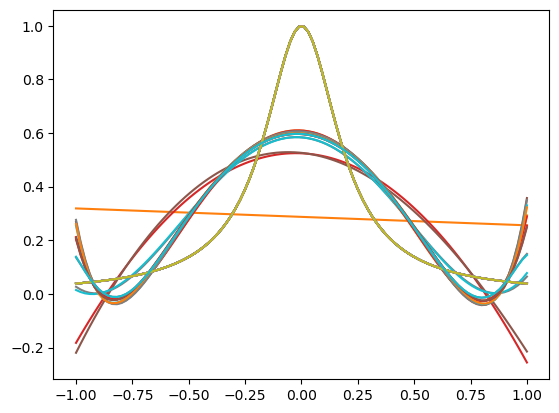

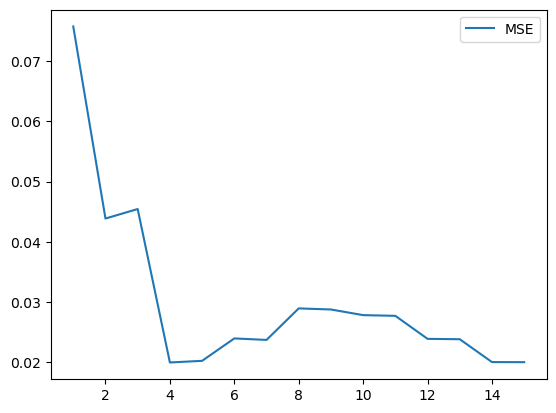

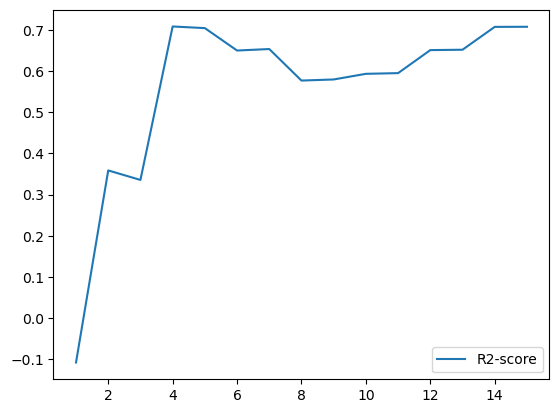

In [285]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

deg_max = 15
MSE=[]
R2_score= []
for p in range(1, deg_max+1):
    X_plot = polynomial_features(x, p, intercept=True)
    X_train = polynomial_features(x_train, p, intercept=True)
    X_test  = polynomial_features(x_test, p, intercept=True)

    scaler = StandardScaler()
    scaler.fit(X_train[:, 1:])

    X_train_s = np.hstack([X_train[:, [0]], scaler.transform(X_train[:, 1:])])
    X_test_s  = np.hstack([X_test[:,  [0]], scaler.transform(X_test[:,  1:])])
    X_plot_s  = np.hstack([X_plot[:,  [0]], scaler.transform(X_plot[:,  1:])])
    
    beta = gradient_descent_OLS(X_train_s, y_train)
    y_pred = X_test_s @ beta
    MSE.append(mean_squared_error(y_test, y_pred))
    R2_score.append(r2_score(y_true=y_test, y_pred=y_pred))
    plt.plot(x, y)
    plt.plot(x, X_plot_s@beta)
plt.show()   
degrees = np.arange(1, deg_max+1)
plt.plot(degrees, MSE, label="MSE")
plt.legend()
plt.show()
plt.plot(degrees, R2_score, label="R2-score")
plt.legend()
plt.show()